
# Fitting a light curve

This example shows how to fit the parameters of a SALT2 model to photometric
light curve data.

First, we'll load an example of some photometric data.


In [33]:
import sncosmo
import pandas as pd
import numpy as np
from astropy.table import Table


def abmag_to_microjy(mag_ab, mag_ab_err):
    """
    Convert AB magnitude and its error to flux and flux error in microJanskys.
    
    Parameters:
    mag_ab (float or np.array): Magnitude in AB system.
    mag_ab_err (float or np.array): Error in magnitude.
    
    Returns:
    tuple: (flux, flux_error) in microJanskys.
    """
    # Convert magnitude to flux
    flux_microjy = 10**((23.9 - mag_ab) / 2.5)
    
    # Convert magnitude error to flux error
    flux_microjy_err = 0.921 * flux_microjy * mag_ab_err
    
    return flux_microjy, flux_microjy_err

def microjy_to_abmag(flux, error):
    abmag = 23.9 - 2.5*np.log10(flux)
    err = 2.5 * (error/(flux*np.log(10)))
    return abmag, err
       

mytblhlf = Table.read("forced_phot_data/hlf/ZTFforced_ph_fnu.csv")

mytblhlf['jd'] -= 2400000.5
mytblhlf.rename_column('fnu_microJy', 'flux')
mytblhlf.rename_column('fnu_microJy_unc', 'flux_err')
mytblhlf.rename_column('passband', 'band')
mytblhlf = mytblhlf[~(mytblhlf["band"] == "ZTF_i")]
for i in range(0,len(mytblhlf)):
    if(mytblhlf['band'][i] == 'ZTF_r'):
        mytblhlf['band'][i] = 'sdssr'
    elif(mytblhlf['band'][i] == 'ZTF_g'):
            mytblhlf['band'][i] = 'sdssg'
mytblhlf.rename_column('zpdiff', 'zp')
mytblhlf['zp'] = 25
mytblhlf['zpsys'] = 'ab'
jd_limit = 60350
mytblhlf = mytblhlf[mytblhlf["jd"] > jd_limit] 
mytblhlf.add_row([60444.900915, abmag_to_microjy(15.798510277446+1.39,0.0902786540333898)[0], abmag_to_microjy(15.798510277446+1.39,0.0902786540333898)[1], 'FELH1500', 1, 8621224, 25.0, 1.0, 0, 'ab'])
mytblhlf.add_row([60448.897009, abmag_to_microjy(16.4183727259123+1.39,0.121939566740434)[0], abmag_to_microjy(16.4183727259123+1.39,0.121939566740434)[1], 'FELH1500', 1, 8621224, 25.0, 1.0, 0, 'ab'])
mytblhlf.add_row([60452.899613, abmag_to_microjy(16.0358528342835+1.39,0.0924017044294628)[0], abmag_to_microjy(16.0358528342835+1.39, 0.0924017044294628)[1], 'FELH1500', 1, 8621224, 25.0, 1.0, 0, 'ab'])
mytblhlf.add_row([60456.900647, abmag_to_microjy(15.2708593745763+1.39, 0.114921094168058)[0], abmag_to_microjy(15.2708593745763+1.39, 0.114921094168058)[1], 'FELH1500', 1, 8621224, 25.0, 1.0, 0, 'ab'])
mytblhlf.add_row([60461.902427, abmag_to_microjy(15.8643607657311+1.39, 0.10585588784115)[0], abmag_to_microjy(15.8643607657311+1.39, 0.10585588784115)[1], 'FELH1500', 1, 8621224, 25.0, 1.0, 0, 'ab'])
mytblhlf


jd,flux,flux_err,band,programid,fcqfid,zp,sys_unc_factor,flags,zpsys
float64,float64,float64,str8,int64,int64,float64,float64,int64,str2
60352.52646989981,8.401350183643343,3.6562443616274796,sdssg,1,8621221,25.0,1.0,0,ab
60352.546134300064,1.378441686682652,5.946893134456491,sdssr,1,8621222,25.0,1.0,256,ab
60354.49120370019,-1.184010805891867,2.9316749056668443,sdssg,1,8621221,25.0,1.0,0,ab
60356.535219899844,-4.194810650793417,3.3639557699706355,sdssr,1,8621222,25.0,1.0,256,ab
60363.281655100174,-20.729683683812144,16.84223769930034,sdssr,1,8621222,25.0,1.0025830116801042,256,ab
60365.34782409994,84.46984526749854,75.13348141400424,sdssg,1,8621221,25.0,1.0,576,ab
60369.35444439994,-2.9420421257285825,4.1345149789176885,sdssg,1,8621221,25.0,1.0,0,ab
60369.41174770007,0.0,4.3786884919933975,sdssr,1,8621222,25.0,1.0,256,ab
60379.306330999825,8.277135912771215,4.9349801274282905,sdssr,1,8621222,25.0,1.0043844940139943,256,ab


An important additional note: a table of photometric data has a
``band`` column and a ``zpsys`` column that use strings to identify
the bandpass (e.g., ``'sdssg'``) and zeropoint system (``'ab'``) of
each observation. If the bandpass and zeropoint systems in your data
are *not* built-ins known to sncosmo, you must register the
corresponding `~sncosmo.Bandpass` or `~sncosmo.MagSystem` to the
right string identifier using the registry.



In [6]:
# create a model
model = sncosmo.Model(source='salt3')

# run the fit
result, fitted_model = sncosmo.fit_lc(
    mytblhlf, model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0.0, 0.15)})  # bounds on parameters (if any)

C:\Users\ranvi\anaconda3\Lib\site-packages\sncosmo\fitting.py:187: RuntimeWarning: Dropping following bands from data: FELH1500(out of model wavelength range)
  warnings.warn("Dropping following bands from data: " +


The first object returned is a dictionary-like object where the keys
can be accessed as attributes in addition to the typical dictionary
lookup like ``result['ncall']``:



In [7]:
print("Number of chi^2 function calls:", result.ncall)
print("Number of degrees of freedom in fit:", result.ndof)
print("chi^2 value at minimum:", result.chisq)
print("model parameters:", result.param_names)
print("best-fit values:", result.parameters)
print("The result contains the following attributes:\n", result.keys())

Number of chi^2 function calls: 1166
Number of degrees of freedom in fit: 84
chi^2 value at minimum: 186.26654902213116
model parameters: ['z', 't0', 'x0', 'x1', 'c']
best-fit values: [ 5.50288192e-02  6.04415287e+04  5.90690818e-04 -8.17108006e-01
 -1.50739737e-04]
The result contains the following attributes:
 dict_keys(['success', 'message', 'ncall', 'chisq', 'ndof', 'param_names', 'parameters', 'vparam_names', 'covariance', 'errors', 'nfit', 'data_mask'])


The second object returned is a shallow copy of the input model with
the parameters set to the best fit values. The input model is
unchanged.



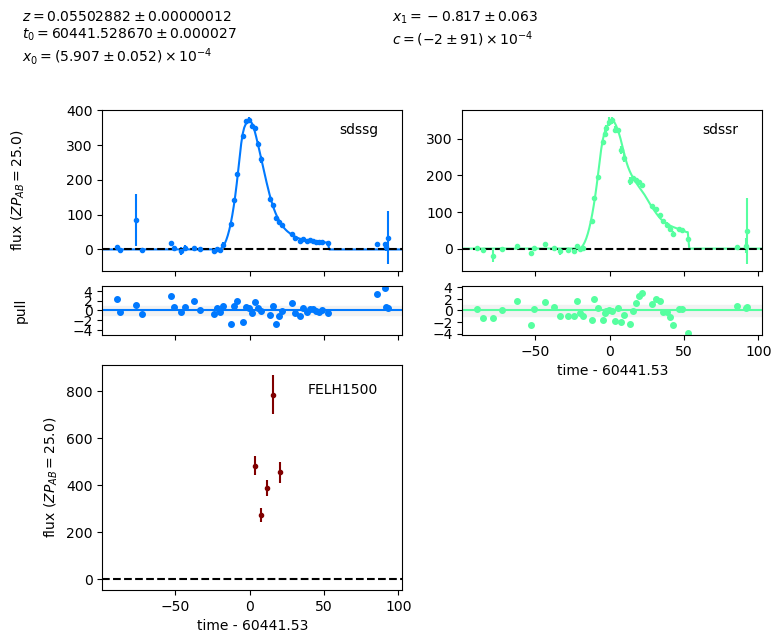

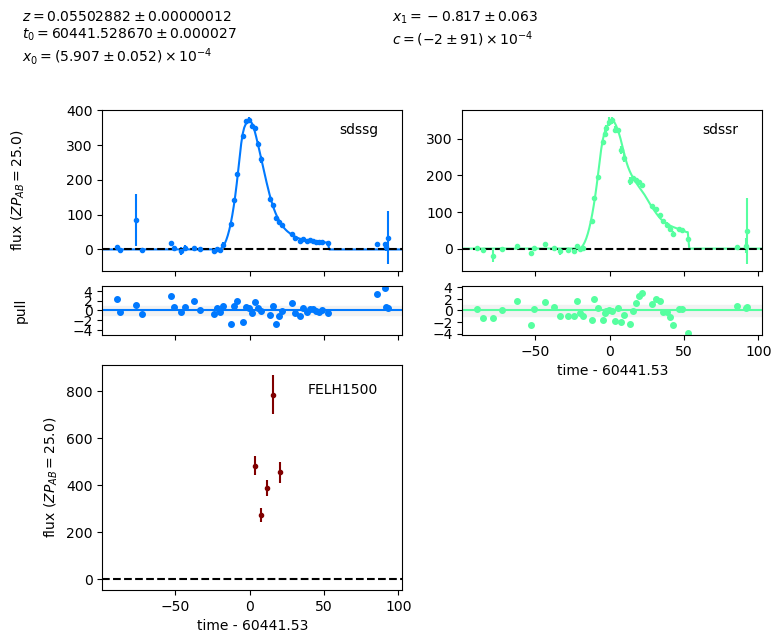

In [8]:
sncosmo.plot_lc(mytblhlf, model=fitted_model, errors=result.errors)

Suppose we already know the redshift of the supernova we're trying to
fit.  We want to set the model's redshift to the known value, and then
make sure not to vary `z` in the fit.



In [9]:
mytblhlo = Table.read("forced_phot_data/hlo/ZTFforced_ph_fnu.csv")

mytblhlo['jd'] -= 2.4*10**6
mytblhlo.rename_column('fnu_microJy', 'flux')
mytblhlo.rename_column('fnu_microJy_unc', 'flux_err')
mytblhlo.rename_column('passband', 'band')
mytblhlo = mytblhlo[~(mytblhlo["band"] == "ZTF_i")]
for i in range(0,len(mytblhlo)):
    if(mytblhlo['band'][i] == 'ZTF_r'):
        mytblhlo['band'][i] = 'sdssr'
    elif(mytblhlo['band'][i] == 'ZTF_g'):
            mytblhlo['band'][i] = 'sdssg'
    #elif(mytblhlo['band'][i] == 'ZTF_i'):
        #mytblhlo['band'][i] = 'sdssi'
mytblhlo.rename_column('zpdiff', 'zp')
mytblhlo['zpsys'] = 'ab'
mytblhlo['zp'] = 25
jd_limit = 60400
mytblhlo = mytblhlo[mytblhlo["jd"] > jd_limit] 
mytblhlo.add_row([60449.027574, abmag_to_microjy(14.5803041397341+0.91, 0.0275544332443146)[0], abmag_to_microjy(14.5803041397341+0.91, 0.0275544332443146)[1], 'BARR-J', 1, 8621223, 25.0, 1.0, 0, 'ab'])
mytblhlo.add_row([60449.042429, abmag_to_microjy(19.309023935159473+1.39, 0.9993860166279182)[0], abmag_to_microjy(19.309023935159473+1.39, 0.9993860166279182)[1], 'FELH1500', 1, 8621224, 25.0, 1.0, 0, 'ab'])
mytblhlo.add_row([60461.963475, abmag_to_microjy(14.4643218899845+1.39, 0.0190374891008449)[0], abmag_to_microjy(14.4643218899845+1.39, 0.0190374891008449)[1], 'FELH1500', 1, 8621224, 25.0, 1.0, 0, 'ab'])

mytblhlo


jd,flux,flux_err,band,programid,fcqfid,zp,sys_unc_factor,flags,zpsys
float64,float64,float64,str8,int64,int64,float64,float64,int64,str2
60404.85699999984,5.892206955,4.131555189,sdssr,1,4260602,25.0,1.0,0,ab
60404.878000000026,3.530973114,4.135017724,sdssg,1,4260601,25.0,1.0,0,ab
60408.85399999982,-0.522861998,3.887652285,sdssg,1,4260601,25.0,1.0,0,ab
60408.90199999977,3.232355813,3.852710992,sdssr,1,4260602,25.0,1.0,0,ab
60413.85300000012,2.822874177,3.575957315,sdssg,1,4260601,25.0,1.0,0,ab
60413.878000000026,3.75176288,3.641986399,sdssr,1,4260602,25.0,1.0,0,ab
60417.851999999955,-4.624156294,5.196310888,sdssg,1,4260601,25.0,1.0,0,ab
60417.85800000001,6.287493965,4.514947935,sdssr,1,4260602,25.0,1.0,0,ab
60419.768999999855,-13.49571606,6.008518537,sdssr,1,4260602,25.0,1.024867994,0,ab


In [10]:
# create a model
model = sncosmo.Model(source='salt3')

# run the fit
result, fitted_model = sncosmo.fit_lc(
    mytblhlo, model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0.0, 0.2)})  # bounds on parameters (if any)

C:\Users\ranvi\anaconda3\Lib\site-packages\sncosmo\fitting.py:187: RuntimeWarning: Dropping following bands from data: FELH1500, BARR-J(out of model wavelength range)
  warnings.warn("Dropping following bands from data: " +


In [11]:
print("Number of chi^2 function calls:", result.ncall)
print("Number of degrees of freedom in fit:", result.ndof)
print("chi^2 value at minimum:", result.chisq)
print("model parameters:", result.param_names)
print("best-fit values:", result.parameters)
print("The result contains the following attributes:\n", result.keys())

Number of chi^2 function calls: 210
Number of degrees of freedom in fit: 59
chi^2 value at minimum: 223.5399237854162
model parameters: ['z', 't0', 'x0', 'x1', 'c']
best-fit values: [2.83079866e-02 6.04401265e+04 4.55722024e-04 1.05321776e+00
 2.01186706e-01]
The result contains the following attributes:
 dict_keys(['success', 'message', 'ncall', 'chisq', 'ndof', 'param_names', 'parameters', 'vparam_names', 'covariance', 'errors', 'nfit', 'data_mask'])


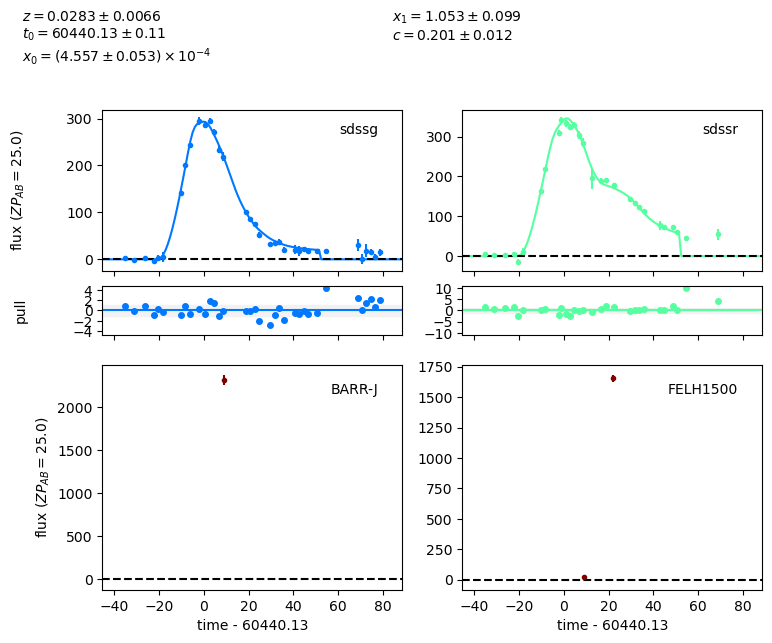

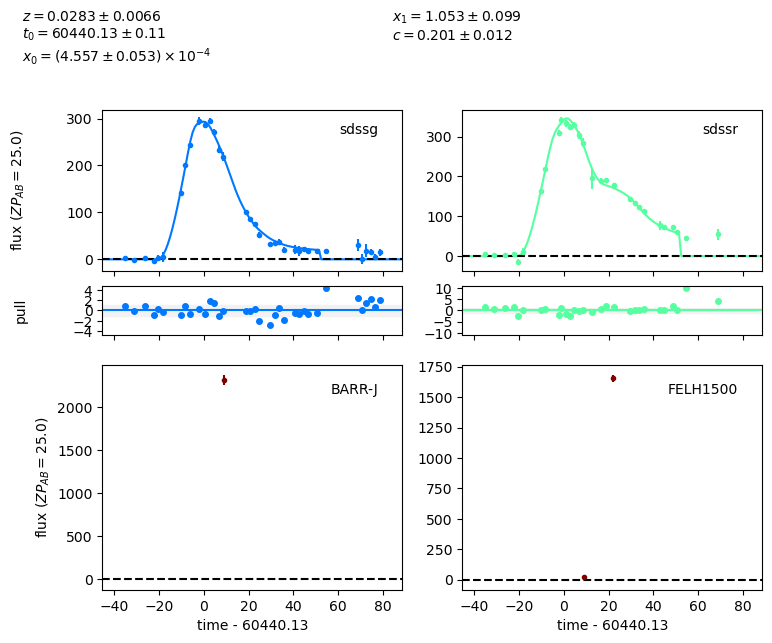

In [12]:
sncosmo.plot_lc(mytblhlo, model=fitted_model, errors=result.errors)

In [13]:
mytblinv = Table.read("forced_phot_data/inv/ZTFforced_ph_fnu.csv")

mytblinv['jd'] -= 2.4*10**6
mytblinv.rename_column('fnu_microJy', 'flux')
mytblinv.rename_column('fnu_microJy_unc', 'flux_err')
mytblinv.rename_column('passband', 'band')
for i in range(0,len(mytblinv)):
    if(mytblinv['band'][i] == 'ZTF_r'):
        mytblinv['band'][i] = 'sdssr'
    elif(mytblinv['band'][i] == 'ZTF_g'):
            mytblinv['band'][i] = 'sdssg'
    elif(mytblinv['band'][i] == 'ZTF_i'):
        mytblinv['band'][i] = 'sdssi'
mytblinv.rename_column('zpdiff', 'zp')
mytblinv['zpsys'] = 'ab'
#jd_limit = 60400
#mytblhlo = mytbl[mytblhlo["jd"] > jd_limit]
mytblinv.add_row([60452.930608, abmag_to_microjy(12.5281095982688+0.91, 0.00392870248894351)[0], abmag_to_microjy(12.5281095982688+0.91, 0.00392870248894351)[1], 'FELH1500', 1, 8621223, 25.0, 1.0, 0, 'ab'])

mytblinv

jd,flux,flux_err,band,programid,fcqfid,zp,sys_unc_factor,flags,zpsys
float64,float64,float64,str8,int64,int64,float64,float64,int64,str2
60231.02785879979,0.8725780719126514,7.378202673309965,sdssr,1,5220602,26.1423,1.0,0,ab
60231.030300899874,-7.437829001132507,7.980960244512329,sdssr,1,5220602,26.173,1.0021753812994598,0,ab
60231.03274310008,-10.922622532261888,8.84069928784166,sdssr,1,5220602,26.201,1.0077107045165423,0,ab
60231.03518520016,1.7567099243601594,14.469093879679065,sdssr,1,5220602,26.203,1.0,512,ab
60231.03761570016,-18.89278563759088,14.832004938876013,sdssr,1,5220602,26.1941,1.0190708071878922,576,ab
60232.0301620001,3.3467278577955324,8.106259469042655,sdssr,1,5220602,26.1751,1.0,0,ab
60232.03259260021,2.2014505980103607,8.647631888537132,sdssr,1,5220602,26.2065,1.0,0,ab
60232.03501159977,1.2404658379584128,9.740952714377247,sdssr,1,5220602,26.2191,1.0,0,ab
60232.0374305998,11.472891841033785,12.605969918419392,sdssr,1,5220602,26.2061,1.00299280715195,0,ab


In [ ]:
# create a model
model = sncosmo.Model(source='salt2')

# run the fit
result, fitted_model = sncosmo.fit_lc(
    mytblinv, model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0.0, 0.2)})  # bounds on parameters (if any)

print("best-fit values:", result.parameters)
sncosmo.plot_lc(mytblinv, model=fitted_model, errors=result.errors)

In [4]:


wavelength = [14900., 17900.]
transmission = [0.9, 0.9]
band = sncosmo.Bandpass(wavelength, transmission, name='FELH1500')

#wavelength = [11200., 13800.]
#transmission = [0.85, 0.85]
#band = sncosmo.Bandpass(wavelength, transmission, name='BARR-J')

sncosmo.register(band)

In [57]:
mytblhlf["band"][mytblhlf["band"] == "sdssg"] = "g"
mytblhlf["band"][mytblhlf["band"] == "sdssr"] = "r"
mytblhlf["band"][mytblhlf["band"] == "FELH1500"] = "H"
mytblhlf["band"][mytblhlf["band"] == "BARR-J"] = "J"

In [62]:
mytblhlo["band"][mytblhlo["band"] == "sdssg"] = "g"
mytblhlo["band"][mytblhlo["band"] == "sdssr"] = "r"
mytblhlo["band"][mytblhlo["band"] == "FELH1500"] = "H"
mytblhlo["band"][mytblhlo["band"] == "BARR-J"] = "J"



In [21]:
#using new w22 model
from bayesn import SEDmodel
import matplotlib.pyplot as plt 
model = SEDmodel(load_model='W22_model')

Current devices: [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]
Currently working in C:\Users\ranvi\URSS
Loading built-in model W22_model


In [22]:
filt_map = {'g': 'g_PS1', 'r': 'r_PS1', 'sdssi': 'i_PS1', 'sdssz': 'z_PS1', 'J': 'J', 'H': 'H'}
samples, sn_props = model.fit(mytblhlf['jd'], mytblhlf['flux'], mytblhlf['flux_err'], mytblhlf['band'],5.50288192e-02 , peak_mjd=6.04415287e+04, ebv_mw = 0.0182, filt_map=filt_map, file_prefix = 'forced_phot_data/hlf/', mag=False)

C:\Users\ranvi\anaconda3\Lib\site-packages\jax\_src\linear_util.py:193: UserWarning: Missing a plate statement for batch dimension -2 at site 'obs'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  ans = self.f(*args, **dict(self.params, **kwargs))


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]


                     mean       std    median      5.0%     95.0%     n_eff     r_hat
          AV[0]      0.76      0.08      0.76      0.64      0.89    810.48      1.00
          Ds[0]     39.44      0.09     39.44     39.31     39.60    750.59      1.00
 eps_tform[0,0]     -0.48      0.94     -0.53     -2.12      1.00   1096.16      1.00
 eps_tform[0,1]     -1.42      0.83     -1.44     -2.79     -0.07    709.03      1.00
 eps_tform[0,2]      1.65      0.83      1.67      0.36      3.10   1243.88      1.00
 eps_tform[0,3]      0.29      0.59      0.24     -0.67      1.25    913.76      1.00
 eps_tform[0,4]     -0.72      0.94     -0.71     -2.35      0.86   2142.13      1.00
 eps_tform[0,5]      1.42      1.02      1.45     -0.42      2.94   1807.57      1.00
 eps_tform[0,6]      0.01      1.04      0.01     -1.69      1.67   2254.88      1.00
 eps_tform[0,7]     -0.64      0.93     -0.69     -2.40      0.74   1931.39      1.00
 eps_tform[0,8]     -0.49      0.91     -0.50     -1.

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.47s/it]


NameError: name 'b_data' is not defined

Getting best fit light curves from chains...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.54s/it]


        jd                 flux             flux_err      band programid  fcqfid  zp  sys_unc_factor flags zpsys
------------------ ------------------- ------------------ ---- --------- ------- ---- -------------- ----- -----
 60352.52646989981   8.401350183643343 3.6562443616274796    g         1 8621221 25.0            1.0     0    ab
 60354.49120370019  -1.184010805891867 2.9316749056668443    g         1 8621221 25.0            1.0     0    ab
 60365.34782409994   84.46984526749854  75.13348141400424    g         1 8621221 25.0            1.0   576    ab
 60369.35444439994 -2.9420421257285825 4.1345149789176885    g         1 8621221 25.0            1.0     0    ab
 60388.32628470007  18.153724967223514  6.143333952270087    g         1 8621221 25.0            1.0     0    ab
 60390.49271989986    3.45258322943921  5.428742933617792    g         1 8621221 25.0            1.0     0    ab
 60395.28473380022 -3.6141347033076165 11.079601586492029    g         1 8621221 25.0           

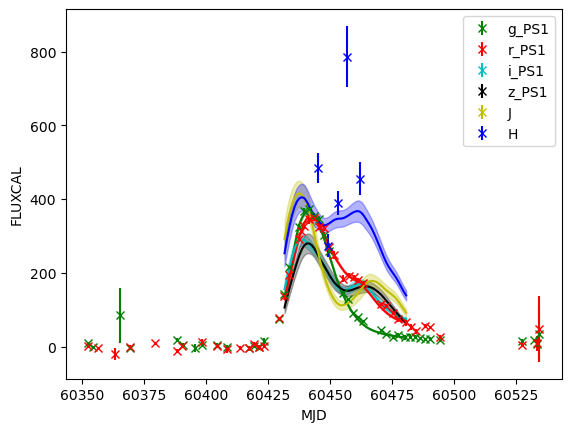

In [23]:
t = np.arange(-10, 40, 1)
bands = ['g_PS1', 'r_PS1', 'i_PS1', 'z_PS1', 'J', 'H']
z, ebv_mw = sn_props
ebv_mw = [0.0182,0]

flux_grid = model.get_flux_from_chains(t, bands, samples, z, ebv_mw, mag=False, num_samples=1000)

plot_t = t + 6.04415287e+04 

fit, fit_err = flux_grid.mean(axis=(0, 1)), flux_grid.std(axis=(0, 1))

cs = ['g', 'r', 'c', 'k', 'y', 'b']

for b_ind, b in enumerate(bands):
    b_data = mytblhlf[mytblhlf['band'] == b[0]]
    print(b_data)
    plt.errorbar(b_data['jd'], b_data['flux'], b_data['flux_err'], fmt=f'{cs[b_ind]}x', label=b)
    plt.plot(plot_t, fit[b_ind, :], color=cs[b_ind])
    plt.fill_between(plot_t, fit[b_ind, :] - fit_err[b_ind, :], fit[b_ind, :] + fit_err[b_ind, :], alpha=0.3, color=cs[b_ind])
plt.xlabel('MJD')
plt.ylabel('FLUXCAL')
plt.legend()
plt.show()

C:\Users\ranvi\anaconda3\Lib\site-packages\jax\_src\linear_util.py:193: UserWarning: Missing a plate statement for batch dimension -2 at site 'obs'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  ans = self.f(*args, **dict(self.params, **kwargs))


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]


                     mean       std    median      5.0%     95.0%     n_eff     r_hat
          AV[0]      0.01      0.01      0.01      0.00      0.02   1274.75      1.01
          Ds[0]     37.68      0.05     37.68     37.60     37.76    628.66      1.00
 eps_tform[0,0]      2.36      0.92      2.36      0.98      3.94   1516.15      1.00
 eps_tform[0,1]     -4.07      0.59     -4.07     -4.96     -3.03   1076.67      1.00
 eps_tform[0,2]      2.88      0.80      2.88      1.68      4.27   1210.02      1.00
 eps_tform[0,3]      1.67      0.51      1.67      0.86      2.49   1300.33      1.00
 eps_tform[0,4]     -1.61      0.92     -1.61     -3.10     -0.08   2015.50      1.00
 eps_tform[0,5]     -3.13      0.96     -3.11     -4.68     -1.64   1960.14      1.00
 eps_tform[0,6]     -0.59      1.01     -0.60     -2.20      1.07   1755.33      1.00
 eps_tform[0,7]      2.71      0.93      2.71      1.12      4.14   1573.22      1.00
 eps_tform[0,8]      0.30      0.99      0.29     -1.

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.67s/it]


g_PS1
        jd             flux       flux_err  band programid  fcqfid  zp  sys_unc_factor flags zpsys
------------------ ------------ ----------- ---- --------- ------- ---- -------------- ----- -----
60404.878000000026  3.530973114 4.135017724    g         1 4260601 25.0            1.0     0    ab
 60408.85399999982 -0.522861998 3.887652285    g         1 4260601 25.0            1.0     0    ab
 60413.85300000012  2.822874177 3.575957315    g         1 4260601 25.0            1.0     0    ab
60417.851999999955 -4.624156294 5.196310888    g         1 4260601 25.0            1.0     0    ab
60419.816999999806  2.513636386 6.993919998    g         1 4260601 25.0            1.0     0    ab
 60421.81300000008  5.846097072 10.60743025    g         1 4260601 25.0            1.0     0    ab
 60429.79400000023  141.7066648 5.181660058    g         1 4260601 25.0    1.082313008     0    ab
 60431.81600000011    200.05064 4.714344314    g         1 4260601 25.0    1.163518249     0    ab
6043

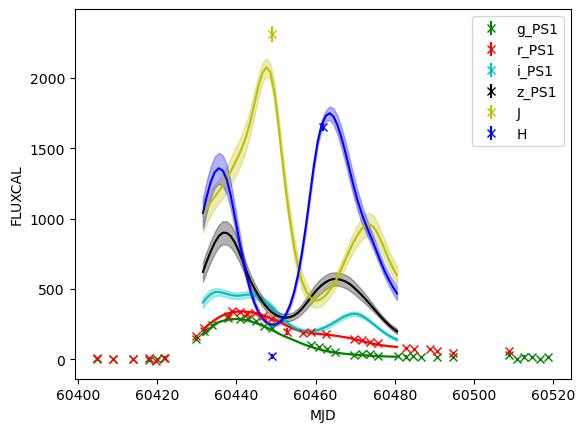

In [63]:
#hlo

filt_map = {'g': 'g_PS1', 'r': 'r_PS1', 'i': 'i_PS1', 'z': 'z_PS1', 'J': 'J', 'H': 'H'}
samples, sn_props = model.fit(mytblhlo['jd'], mytblhlo['flux'], mytblhlo['flux_err'], mytblhlo['band'],5.50288192e-02 , peak_mjd=6.04415287e+04, ebv_mw = 1.0237, filt_map=filt_map, file_prefix = 'forced_phot_data/hlo/', mag=False)

t = np.arange(-10, 40, 1)
bands = ['g_PS1', 'r_PS1', 'i_PS1', 'z_PS1', 'J', 'H']
z, ebv_mw = sn_props
ebv_mw = [1.0237,0]

flux_grid = model.get_flux_from_chains(t, bands, samples, z, ebv_mw, mag=False, num_samples=1000)

import matplotlib.pyplot as plt

plot_t = t + 6.04415287e+04 

fit, fit_err = flux_grid.mean(axis=(0, 1)), flux_grid.std(axis=(0, 1))

cs = ['g', 'r', 'c', 'k', 'y', 'b']

for b_ind, b in enumerate(bands):
    print(b)
    b_data = mytblhlo[mytblhlo['band'] == b[0]]
    print(b_data)
    plt.errorbar(b_data['jd'], b_data['flux'], b_data['flux_err'], fmt=f'{cs[b_ind]}x', label=b)
    plt.plot(plot_t, fit[b_ind, :], color=cs[b_ind])
    plt.fill_between(plot_t, fit[b_ind, :] - fit_err[b_ind, :], fit[b_ind, :] + fit_err[b_ind, :], alpha=0.3, color=cs[b_ind])
plt.xlabel('MJD')
plt.ylabel('FLUXCAL')
plt.legend()
plt.show()

In [58]:
mytblhlf2 = mytblhlf[mytblhlf["band"]!="H"]
mytblhlf2

jd,flux,flux_err,band,programid,fcqfid,zp,sys_unc_factor,flags,zpsys
float64,float64,float64,str8,int64,int64,float64,float64,int64,str2
60352.52646989981,8.401350183643343,3.6562443616274796,g,1,8621221,25.0,1.0,0,ab
60352.546134300064,1.378441686682652,5.946893134456491,r,1,8621222,25.0,1.0,256,ab
60354.49120370019,-1.184010805891867,2.9316749056668443,g,1,8621221,25.0,1.0,0,ab
60356.535219899844,-4.194810650793417,3.3639557699706355,r,1,8621222,25.0,1.0,256,ab
60363.281655100174,-20.729683683812144,16.84223769930034,r,1,8621222,25.0,1.0025830116801042,256,ab
60365.34782409994,84.46984526749854,75.13348141400424,g,1,8621221,25.0,1.0,576,ab
60369.35444439994,-2.9420421257285825,4.1345149789176885,g,1,8621221,25.0,1.0,0,ab
60369.41174770007,0.0,4.3786884919933975,r,1,8621222,25.0,1.0,256,ab
60379.306330999825,8.277135912771215,4.9349801274282905,r,1,8621222,25.0,1.0043844940139943,256,ab


C:\Users\ranvi\anaconda3\Lib\site-packages\jax\_src\linear_util.py:193: UserWarning: Missing a plate statement for batch dimension -2 at site 'obs'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  ans = self.f(*args, **dict(self.params, **kwargs))


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]


                     mean       std    median      5.0%     95.0%     n_eff     r_hat
          AV[0]      0.18      0.09      0.17      0.04      0.32    476.92      1.01
          Ds[0]     40.10      0.11     40.10     39.92     40.26    439.82      1.01
 eps_tform[0,0]      0.40      0.95      0.37     -0.96      2.13    903.07      1.00
 eps_tform[0,1]      0.98      0.83      1.02     -0.33      2.33    678.27      1.00
 eps_tform[0,2]      0.54      0.82      0.53     -0.78      1.81    819.52      1.00
 eps_tform[0,3]      0.17      0.69      0.17     -0.90      1.36    606.85      1.01
 eps_tform[0,4]     -0.27      0.95     -0.29     -1.84      1.27    963.72      1.00
 eps_tform[0,5]      0.07      0.99      0.08     -1.41      1.66   1749.42      1.00
 eps_tform[0,6]     -0.07      1.02     -0.07     -1.91      1.51   1844.34      1.00
 eps_tform[0,7]     -0.08      0.92     -0.11     -1.64      1.30   1656.56      1.00
 eps_tform[0,8]     -0.05      0.92     -0.05     -1.

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.19s/it]


        jd                 flux             flux_err      band programid  fcqfid  zp  sys_unc_factor flags zpsys
------------------ ------------------- ------------------ ---- --------- ------- ---- -------------- ----- -----
 60352.52646989981   8.401350183643343 3.6562443616274796    g         1 8621221 25.0            1.0     0    ab
 60354.49120370019  -1.184010805891867 2.9316749056668443    g         1 8621221 25.0            1.0     0    ab
 60365.34782409994   84.46984526749854  75.13348141400424    g         1 8621221 25.0            1.0   576    ab
 60369.35444439994 -2.9420421257285825 4.1345149789176885    g         1 8621221 25.0            1.0     0    ab
 60388.32628470007  18.153724967223514  6.143333952270087    g         1 8621221 25.0            1.0     0    ab
 60390.49271989986    3.45258322943921  5.428742933617792    g         1 8621221 25.0            1.0     0    ab
 60395.28473380022 -3.6141347033076165 11.079601586492029    g         1 8621221 25.0           

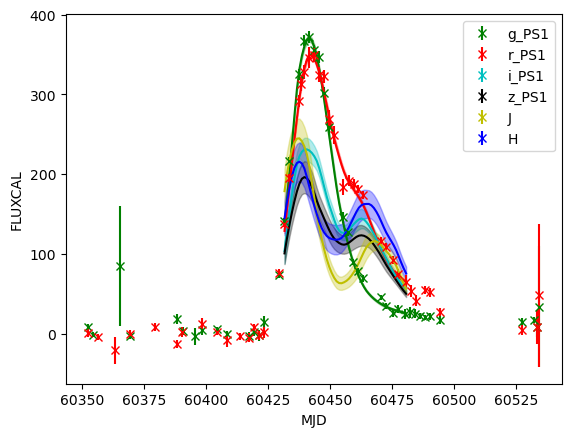

In [59]:
#hlf2
filt_map = {'g': 'g_PS1', 'r': 'r_PS1', 'sdssi': 'i_PS1', 'sdssz': 'z_PS1', 'J': 'J', 'H': 'H'}
samples, sn_props = model.fit(mytblhlf2['jd'], mytblhlf2['flux'], mytblhlf2['flux_err'], mytblhlf2['band'],5.50288192e-02 , peak_mjd=6.04415287e+04, ebv_mw = 0.0182, filt_map=filt_map, file_prefix = 'forced_phot_data/hlf/', mag=False)

t = np.arange(-10, 40, 1)
bands = ['g_PS1', 'r_PS1', 'i_PS1', 'z_PS1', 'J', 'H']
z, ebv_mw = sn_props
ebv_mw = [0.0182,0]

flux_grid = model.get_flux_from_chains(t, bands, samples, z, ebv_mw, mag=False, num_samples=1000)

plot_t = t + 6.04415287e+04 

fit, fit_err = flux_grid.mean(axis=(0, 1)), flux_grid.std(axis=(0, 1))

cs = ['g', 'r', 'c', 'k', 'y', 'b']

for b_ind, b in enumerate(bands):
    b_data = mytblhlf2[mytblhlf2['band'] == b[0]]
    print(b_data)
    plt.errorbar(b_data['jd'], b_data['flux'], b_data['flux_err'], fmt=f'{cs[b_ind]}x', label=b)
    plt.plot(plot_t, fit[b_ind, :], color=cs[b_ind])
    plt.fill_between(plot_t, fit[b_ind, :] - fit_err[b_ind, :], fit[b_ind, :] + fit_err[b_ind, :], alpha=0.3, color=cs[b_ind])
plt.xlabel('MJD')
plt.ylabel('FLUXCAL')
plt.legend()
plt.show()

In [35]:
microjy_to_abmag(405.05786276, 36.7323439)

(17.38120733281265, 0.09845910751147822)

In [52]:
def HubbleConst(redshift, mag, error):
    distance_Mpc = (10**((mag+18.5)/5+1))*(10**-6)
    H_0 = (redshift*3*10**5)/distance_Mpc
    err = redshift*(3/5)*H_0*np.log(10)*error
    return H_0, err

In [53]:
HubbleConst(0.038907,microjy_to_abmag(405.05786276, 36.7323439)[0], microjy_to_abmag(405.05786276, 36.7323439)[1])

(77.78709147047262, 0.41167842936740145)

In [61]:
HubbleConst(0.038907,microjy_to_abmag(215.60895749, 24.32232079)[0], microjy_to_abmag(215.60895749, 24.32232079)[1])

(56.75216052400147, 0.37362817278622257)

In [76]:
HubbleConst(0.044721,microjy_to_abmag(1749.3318702980823, 47.305671138515386)[0], microjy_to_abmag(1749.3318702980823, 47.305671138515386)[1])

(185.80990664109345, 0.33706420172603535)

In [75]:
print(np.max(fit[6,:]))
print(fit_err[6,:][np.where(fit[6,:] == np.max(fit[6,:]))[0][0]])

1749.3318702980823
47.305671138515386


In [7]:
mytblhlf2 = mytblhlf[mytblhlf["band"]!="H"]

In [ ]:
#hlf2
filt_map = {'g': 'g_PS1', 'r': 'r_PS1', 'sdssi': 'i_PS1', 'sdssz': 'z_PS1', 'J': 'J', 'H': 'H'}
samples, sn_props = model.fit(mytblhlf2['jd'], mytblhlf2['flux'], mytblhlf2['flux_err'], mytblhlf2['band'],5.50288192e-02 , peak_mjd=6.04415287e+04, ebv_mw = 0.0182, filt_map=filt_map, file_prefix = 'forced_phot_data/hlf/', mag=False)
                              